![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/58563302-42466a80-8201-11e9-9948-b3e9f88a5662.jpg"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>

# Exercises
## Bike store sales_clean

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Hands on! 

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.12.4


In [2]:
#Instalando pacote para fazer referências a outros pacotes.
# Versão minima obrigatória: Python >=3.8
!pip install importnb

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import importnb 
import seaborn as sns


# Usando o pacote importnb
from importnb import imports
with imports("ipynb"):
    import limpeza as clean
    
%matplotlib inline

In [4]:
sales = pd.read_csv(
    'data/sales_data.csv',
    parse_dates=['Date'])

In [5]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

# Apagando duplicatas 
Com o comando do bloco acima, achamos 1000 linhas duplicadas e usaremos o comando do bloco abaixo, para deixar apenas 1. 

Por precaução iremos trabalhar com cópia e usaremos essa cópia para todas as melhorias.

🚨 Quando evitar o reset de indice:

Se o índice contém informações úteis (exemplo: datas em séries temporais), resetá-lo pode ser desnecessário.

Se precisar manter o índice original como uma coluna, use:

```py
df_indice_sales_clean = df.reset_index() # nome totalmente personalizavel
```

In [7]:
# Verificando se há registros duplicados
clean.check_duplicates(sales, False)# False apenas mostra o valor de linhas duplicadas, True, mostra as linhas duplicadas


1000

In [8]:
# Criando uma cópia do DataFrame original
sales_clean = sales.copy() # Se não fizermos isso, o sales_clean seria apenas uma referência ao dataframe original.
sales_clean = sales_clean.drop_duplicates().reset_index(drop=True) # Remove duplicatas e reseta o índice  
sales_clean.columns = sales_clean.columns.str.strip().str.lower().str.replace(" ", "_") # Modifica e garante que
#todo os nomes das colunas serão padronizados

In [9]:
# Verificando se há registros duplicados
clean.check_duplicates(sales_clean, False)# False apenas mostra o valor de linhas duplicadas, True, mostra as linhas duplicadas


0

In [10]:
sales_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112036 entries, 0 to 112035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date              112036 non-null  datetime64[ns]
 1   day               112036 non-null  int64         
 2   month             112036 non-null  object        
 3   year              112036 non-null  int64         
 4   customer_age      112036 non-null  int64         
 5   age_group         112036 non-null  object        
 6   customer_gender   112036 non-null  object        
 7   country           112036 non-null  object        
 8   state             112036 non-null  object        
 9   product_category  112036 non-null  object        
 10  sub_category      112036 non-null  object        
 11  product           112036 non-null  object        
 12  order_quantity    112036 non-null  int64         
 13  unit_cost         112036 non-null  int64         
 14  unit

## convertendo e ajustando os tipos de dados

Todos os métodos chamando tem a possibilidade de serem inplace, ou seja.
inplace (bool): Se True, modifica o DataFrame original. Caso contrário, retorna um novo DataFrame.

## Escolhendo o tipo de cada dado 


Colunas Unit_Cost, Unit_Price, Profit, Cost, Revenue → Alteradas de int64 para float32.

Esses valores podem futuramente ter casas decimais.

float64 não é necessário, pois oferece uma precisão excessiva sem ganho prático.

- Coluna customer_age →→  Idades não passam de 127, então int8 é o suficiente, pois não haverá soma.
- Coluna Month →→ A coluna possui apenas 12 valores únicos possíveis, category é a melhor escolha.
- Coluna Customer_Gender →→ há apenas 2 valores únicos e mesmo que expanda, category atende a expectativa.
- Coluna OrderQuantity →→ Fizemos a suposição de que não haverá compras maiores de 32.767 unidades.
- - Caso venha existir, basta modificarmos para int32
- Colunas Year e Day →→ int16 (limite do int16 -32.768 a 32.767).
- - Mesmo que haja soma de dias, int8 não seria adequado, pois poderia ultrapassar seu limite (127).
  - 1 ano tem 52 semanas
  - 10 anos possui 3.652 dias
  - o int8 não foi usado pelos motivos acima, pois se houver soma ou periodo de vendas de mês x a y, pode ultrapassar 127 dias que é o limite.
- Colunas Unit_Cost, Unit_Price, Profit, Cost, Revenue → Alteradas de int64 para float32.
- - Esses valores podem no futuro ter casas decimais.
 - Não é ncessário o float64, pois oferece um precisão excessiva sem ganho prático.

## Sempre consulte dados históricos (se disponivel) e analise o mercado do seu cliente.
- Se for B2B, atacado ou indústrias, sempre o mínimo será float32, mas escolha a precição necessária com cuidado.
- Se for numero inteiro, use no minimo o int32, observe que o limite (até 2,1 bilhões) e isso envolve calculos.
- float32 
- - Apesar de suportar 100.000.000.000.000.000.000.000.000.000.000.000.000 ou seja 3.4028235 × 10³⁸.
- - A precisão é de apenas de 7 casas decimais, acima disso será feito uma aproximação
- float64
- - Apesar de suportar 1.7976931348623157 × 10³⁰⁸ ou seja, um número com 308 zeros!(quer saber quantos seria esse numero escrito? confir ano bloco abaixo)
  - A precisão é de apenas 15 casas decimais ou seja 10¹⁵
  - Para fins de curiosidade abaixo algum valores gigantesco.
  - O número de átomos no universo observável, que é estimado em cerca de 10⁸⁰.
  - O número de Planck, que é uma unidade de tempo extremamente pequena, cerca de 10⁻⁴³ segundos.

Então sim mesmo que o float64 suporte a quantidade citada acima tranquilamente, qualquer tentativa de calculo, perderá completamenta a precisão.

Para tentar compreender esses numeros podemos tentar o float128(os processadores convencionais, geralmente não suportam).
Se realmente quiser tentar usar esses valores gigantes com precisão maior que o float64, poderá tentar outras bibliotecas como mpmath ou decimal.0dos.



|Tipo          | Tamanho (bits) | Faixa de Valores (Aproximado)      | 1M Linhas (MB) | 10M Linhas (MB) | 100M Linhas (MB) | 1B Linhas (GB) | Uso Recomendado                                    |
| ------------- | -------------- | ---------------------------------- | -------------- | --------------- | ---------------- | -------------- | -------------------------------------------------- |
| **`int8`**    | 8 bits         | -128 a 127                         | 1 MB           | 10 MB           | 100 MB           | 1 GB          
| **`int16`**   | 16 bits        | -32.768 a 32.767                   | 2 MB           | 20 MB           | 200 MB           | 2 GB          
| **`int32`**   | 32 bits        | -2,1 bilhões a 2,1 bilhões         | 4 MB           | 40 MB           | 400 MB           | 4 GB          
| **`int64`**   | 64 bits        | -9,2 quintilhões a 9,2 quintilhões | 8 MB           | 80 MB           | 800 MB           | 8 GB          
| **`float16`** | 16 bits        | ±65.504 com precisão limitada      | 2 MB           | 20 MB           | 200 MB           | 2 GB           | Machine learning, se a PRECISÃO NÃO FOR UM FOCO PRINCIPAL |
| **`float32`** | 32 bits        | ±3,4 × 10³⁸                        | 4 MB           | 40 MB           | 400 MB           | 4 GB           | Cálculos científicos e machine learning.           |
| **`float64`** | 64 bits        | ±1,8 × 10³⁰⁸                       | 8 MB           | 80 MB           | 800 MB           | 8 GB           | Precisão alta, análises financeiras, estatísticas. |

## float64 escrito por extenso.
179.769.313.486.231.570.814.527.423.731.704.356.798.070.567.525.844.996.598.917.476.803.157.260.780.028.538.760.908.848.432.135.198.019.337.
228.085.613.363.324.081.597.072.961.011.449.093.694.240.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.
000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.
000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.
000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.
000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.
000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.
000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.
000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.
000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.
000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.
000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.
000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.
000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.
000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.
000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.
000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.
000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.
000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.
000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.
000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.
000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.
000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.
000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.
000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.
000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.
000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.
000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.
000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.
000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.
000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.
000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000.000


# Metódos criados 

- Foi criado métodos que facilitam a conversão das colunas.
- Os métodos suportam inplace True ou False(se for False, não precisa ser declarado.)
- inplace=False (padrão): Retorna um novo DataFrame, e você precisa atribuí-lo de volta à variável (ou a uma nova variável).
- inplace=True: Modifica o DataFrame original diretamente, sem necessidade de atribuição.

No nosso caso, já estamos com uma cópia do dataframe que se chama sales.clean ou seja podemos dizer que o inplace é True

Abaixo um exemplo da capacidade do float16, 32 e 64.
pode simular o valor da compra a taxa de juros e as parcelas. 
se a taxa for de 5% não teriamos alteração mas se for 8%, já teriamos um prejuizo de 50 centavos e dependendo do valor, parcelas, quantidade de clientes, esse valor pode aumentar e ser multiplicado.

In [11]:
# EXEMPLO ILUSTRATIVO DOS FLOAT, NÃO TEM RELAÇÃO COM O DATASET
valor_compra = 2500.00
taxa_juros = 0.8  # 8% ao mês
parcelas = 24

# Função para calcular valor da parcela
def calcular_parcela(valor, taxa, n, dtype=np.float64):
    valor = np.array(valor, dtype=dtype)
    taxa = np.array(taxa, dtype=dtype)
    n = np.array(n, dtype=dtype)
    
    pmt = valor * (taxa * (1 + taxa) ** n) / ((1 + taxa) ** n - 1)
    return round(float(pmt), 2)  # Arredondar para 2 casas decimais

# Cálculos
parcela_float64 = calcular_parcela(valor_compra, taxa_juros, parcelas, dtype=np.float64)
parcela_float32 = calcular_parcela(valor_compra, taxa_juros, parcelas, dtype=np.float32)
parcela_float16 = calcular_parcela(valor_compra, taxa_juros, parcelas, dtype=np.float16)

# Exibir resultados
print(f"Parcela com float64: R$ {parcela_float64}")
print(f"Parcela com float32: R$ {parcela_float32}")
print(f"Diferença do float64 para float32: R$ {abs(parcela_float64 - parcela_float32):.10f}\n")  # Diferença entre os cálculos

print(f"Parcela com float32: R$ {parcela_float32}")
print(f"Parcela com float16: R$ {parcela_float16}")
print(f"Diferença do float32 para float16: R$ {abs(parcela_float32 - parcela_float16):.10f}")  # Diferença entre os cálculos


Parcela com float64: R$ 2000.0
Parcela com float32: R$ 2000.0
Diferença do float64 para float32: R$ 0.0000000000

Parcela com float32: R$ 2000.0
Parcela com float16: R$ 1999.51
Diferença do float32 para float16: R$ 0.4900000000


In [12]:
# Modifica sales_clean diretamente, sem precisar criar uma nova variável
clean.converter_para_int8(sales_clean, ["customer_age"], inplace=True)
clean.converter_para_categoria(sales_clean, ["customer_gender", "product_category", "sub_category"], inplace=True)

clean.converter_para_int16(sales_clean, ["order_quantity", "year", "day"], inplace=True)
# clean.converter_para_int32(sales_clean, ["Order_Quantity"], inplace=True) # Caso futuro
clean.converter_para_float32(sales_clean, ['unit_cost', 'unit_price', 'profit', 'cost', 'revenue'], inplace=True)

clean.converter_para_object(sales_clean, ["product"], inplace=True)


df = clean.sort_month_column(sales_clean, 'month', locale="pt_BR")


,date,day,month,year,customer_age,age_group,customer_gender,country,state,product_category,sub_category,product,order_quantity,unit_cost,unit_price,profit,cost,revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45.0,120.0,590.0,360.0,950.0
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45.0,120.0,590.0,360.0,950.0
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45.0,120.0,1366.0,1035.0,2401.0
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45.0,120.0,1188.0,900.0,2088.0
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45.0,120.0,238.0,180.0,418.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24.0,64.0,112.0,72.0,184.0
112032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24.0,64.0,655.0,528.0,1183.0
112033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24.0,64.0,655.0,528.0,1183.0
112034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24.0,64.0,684.0,576.0,1260.0


In [ ]:
# Os meses podem virar
month_order = [
    "January", "February", "March", "April", "May", "June", 
    "July", "August", "September", "October", "November", "December"
]

# Converter a coluna para categoria ordenada
sales_clean['month'] = pd.Categorical(sales_clean['month'], categories=month_order, ordered=True)

# Agora a contagem já estará na ordem correta
sales_clean['month'].value_counts().sort_index()


In [13]:
sales_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112036 entries, 0 to 112035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date              112036 non-null  datetime64[ns]
 1   day               112036 non-null  int16         
 2   month             112036 non-null  category      
 3   year              112036 non-null  int16         
 4   customer_age      112036 non-null  int8          
 5   age_group         112036 non-null  object        
 6   customer_gender   112036 non-null  category      
 7   country           112036 non-null  object        
 8   state             112036 non-null  object        
 9   product_category  112036 non-null  category      
 10  sub_category      112036 non-null  category      
 11  product           112036 non-null  object        
 12  order_quantity    112036 non-null  int16         
 13  unit_cost         112036 non-null  float32       
 14  unit

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What's the mean of `Customers_Age`?

In [14]:
#"A média é de:", sales_clean['customer_age'].mean()
sales_clean['customer_age'].agg(['mean', 'median', 'std', 'min', 'max']) # preferi por usar esse comando compacto e mostra a média
#além de outros valores


mean      35.919508
median    35.000000
std       11.016543
min       17.000000
max       87.000000
Name: customer_age, dtype: float64

Why don't you try with `.mean()`

Go ahead and show a <b>density (KDE)</b> and a <b>box plot</b> with the `customer_age` data:

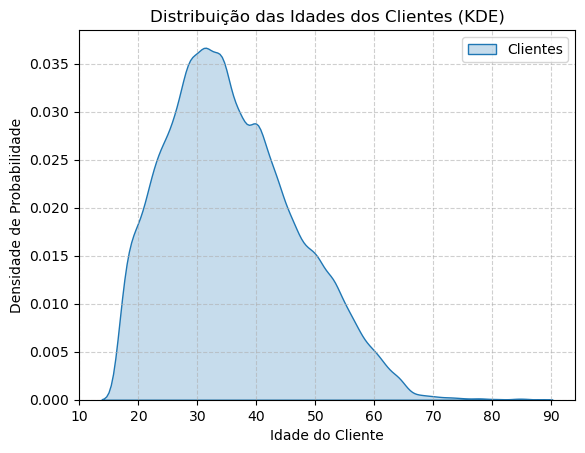

In [15]:
# Criação do gráfico KDE
sns.kdeplot(data=sales_clean, x='customer_age', fill=True, label='Clientes', bw_adjust=1)
plt.legend()

# Títulos e rótulos
plt.title('Distribuição das Idades dos Clientes (KDE)')
plt.xlabel('Idade do Cliente')
plt.ylabel('Densidade de Probabilidade')
plt.grid(True, linestyle='--', alpha=0.6) # Usa os tracejados e faz a grade ter 60% de opacidade

# Exibir gráfico
plt.show()

<Axes: ylabel='Density'>

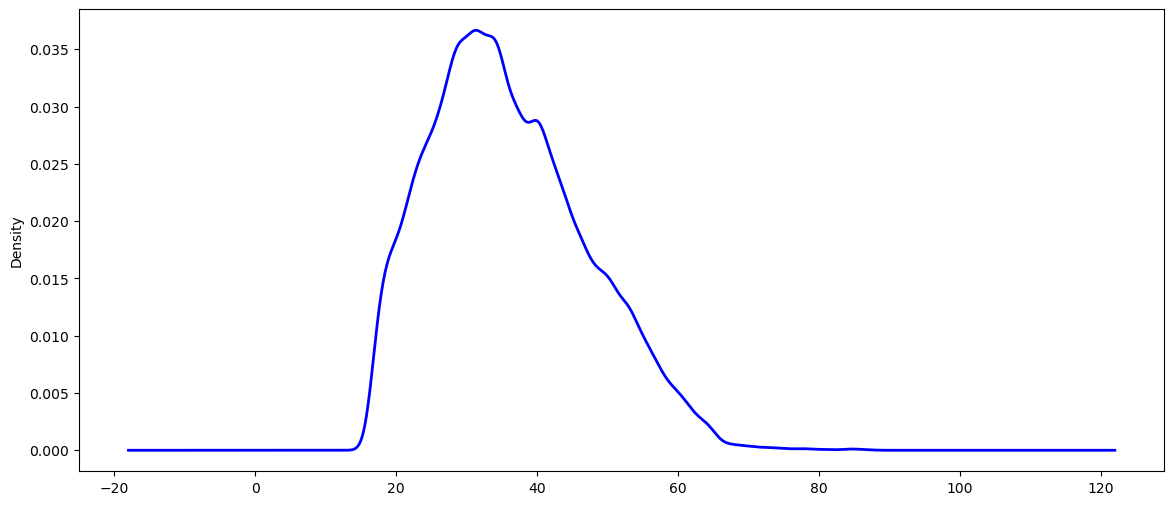

In [16]:
# Uma versão básica do código.
sales_clean['customer_age'].plot(kind='kde', figsize=(14,6), linewidth=2, color='blue') 

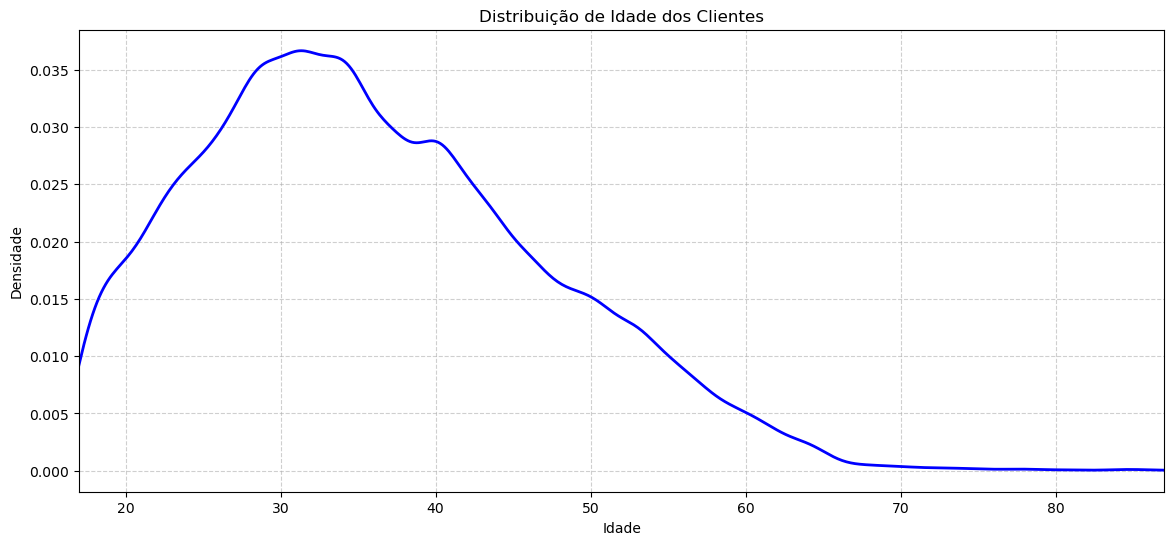

In [17]:
# Aqui eu brinquei um pouco e percebi que deixar o grafico no básico, tipo titulo, nome na coluna, linha e etc
# é muito simples. 
ax = sales_clean['customer_age'].plot(kind='kde', figsize=(14,6), linewidth=2, color='blue')
# figsize define o tamanho do grafico em polegadas

plt.xlim(sales_clean['customer_age'].min(), sales_clean['customer_age'].max())  # Define os limites do eixo X
plt.title('Distribuição de Idade dos Clientes')
plt.xlabel('Idade')
plt.ylabel('Densidade')
plt.grid(True, linestyle='--', alpha=0.6) # faz a grade ter 60% de opacidade
plt.show()

# Eu acho que pode ser interessante dependendo do publico ter essa limitação do eixo, claro não testei em inumeros casos.
# Eu sei que o foco do KDE é fazer uma suavização e proporcionar uma continuidade artificial da distribuição, porem em alguns casos
# como esse eu acho válido. 

# Explicando o gráfico box


- Variáveis showmeans=True e meanline=True
- -  Exibe a média da idade dos clientes com uma linha tracejada em dentro da box.
- A variável patch_artist=True, boxprops=dict(facecolor="lightblue")
- - Muda a cor de fundo para lightblue, facilitando a visualização

## Linhas em dentro da box 
- Linha reta é a mediana.
- Linha tracejada é a média.


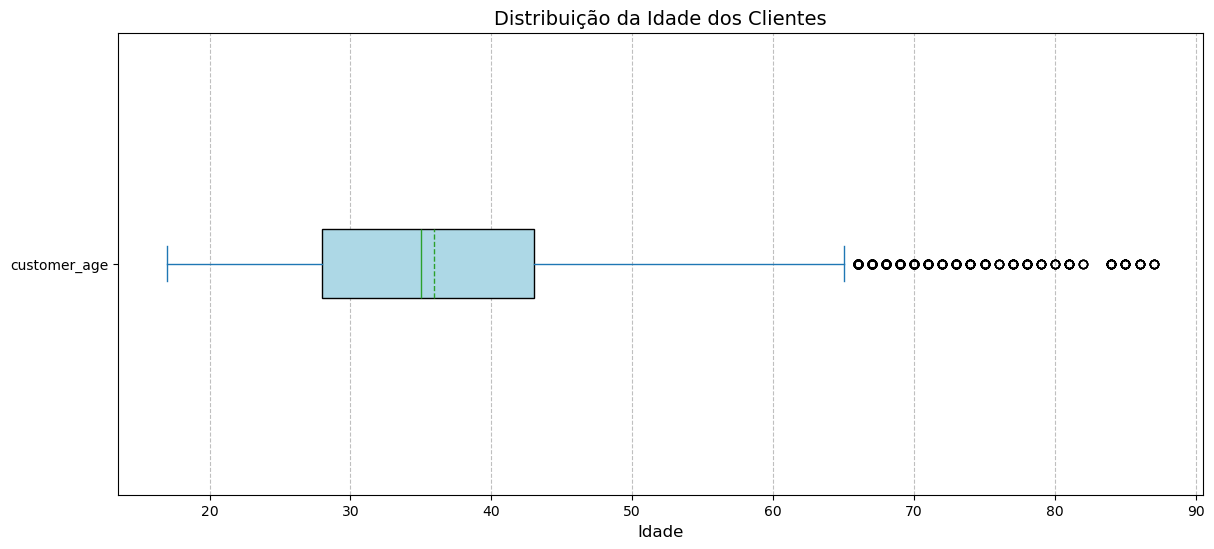

In [18]:
# Configuração do boxplot com personalizações
plt.figure(figsize=(14, 6))
boxplot = sales_clean['customer_age'].plot(kind='box', vert=False, 
                                           showmeans=True, meanline=True, 
                                           patch_artist=True, boxprops=dict(facecolor="lightblue"))

# Adicionando títulos e rótulos
plt.title('Distribuição da Idade dos Clientes', fontsize=14)
plt.xlabel('Idade', fontsize=12)
plt.grid(axis='x', linestyle="--", alpha=0.8)

# Exibir o gráfico
plt.show()


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What's the mean of `order_quantity`?

- Podemos usa o numpy para calcular a média.
- - np.mean(sales_clean['order_quantity']) # podemos usar o numpy para obter a média
  - np.nanmean(sales_clean['order_quantity']) # Esse comando do numpy é muito útil, pois ele não incluiu valores ausentes NaN.
 
Só por precaução, podemos usar o comando de fazer a média ignorando se tiver NaN e de fato os valores confere com a média,
comprovando que realmente não há valores.

In [19]:
# your code goes here
#np.mean(sales_clean['order_quantity']) # podemos usar o numpy para obter a média
np.nanmean(sales_clean['order_quantity']) # Esse comando do numpy é muito útil, pois ele não incluiu valores ausentes NaN


11.904253989788996

In [20]:
sales_clean['order_quantity'].mean()

11.904253989788996

Go ahead and show a <b>histogram</b> and a <b>box plot</b> with the `Order_Quantity` data:

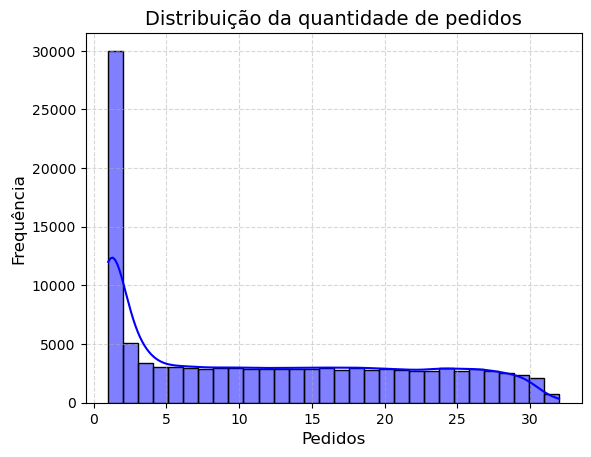

In [21]:
# your code goes here
sns.histplot(
    sales_clean['order_quantity'], 
    bins=30, 
    color='blue', 
    edgecolor='black', 
    kde=True
)

# Adicionando grid
plt.grid(True, linestyle='--', alpha=0.5)

# Personalizando os rótulos e título
plt.title('Distribuição da quantidade de pedidos', fontsize=14)
plt.xlabel('Pedidos', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(fontsize=10)  # Tamanho do texto no eixo X
plt.yticks(fontsize=10)  # Tamanho do texto no eixo Y

plt.show()

<Axes: ylabel='Frequency'>

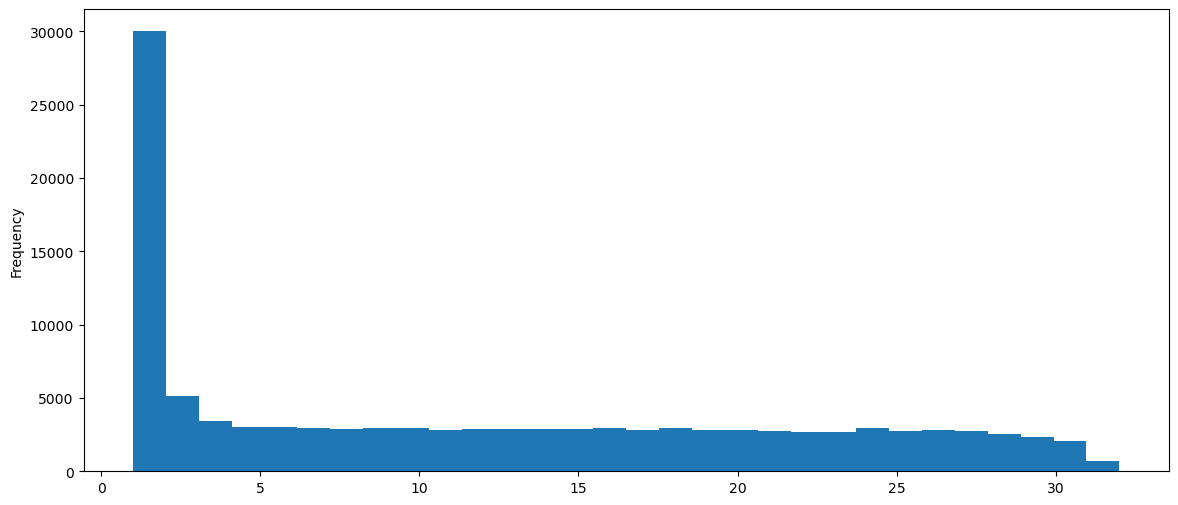

In [22]:
sales_clean['order_quantity'].plot(kind='hist', bins=30, figsize=(14,6))

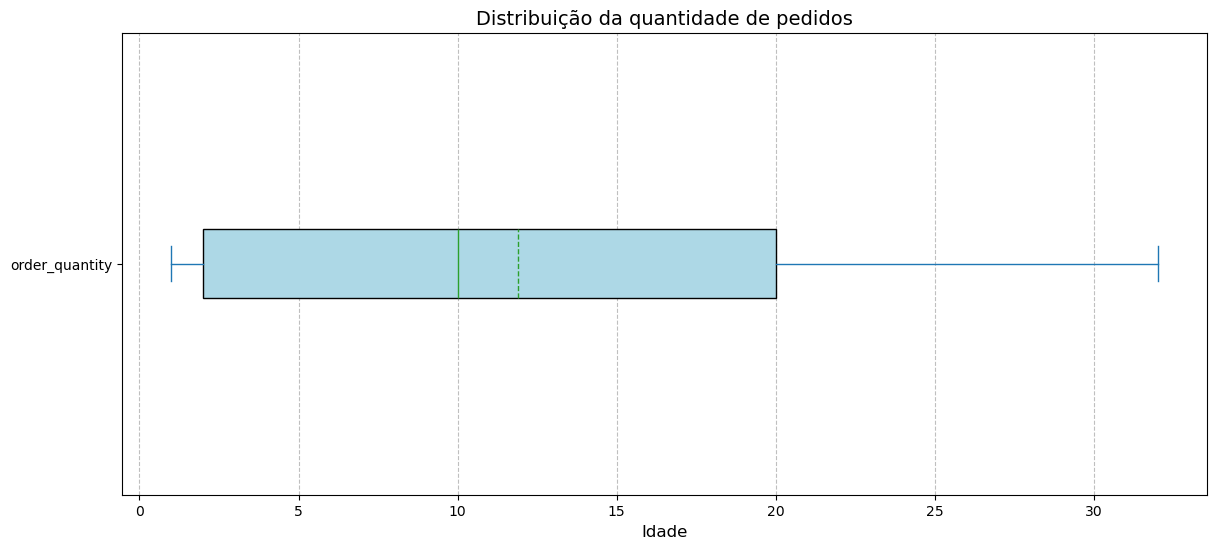

In [23]:
# Configuração do boxplot com personalizações
plt.figure(figsize=(14, 6))
boxplot = sales_clean['order_quantity'].plot(kind='box', vert=False, 
                                           showmeans=True, meanline=True, 
                                           patch_artist=True, boxprops=dict(facecolor="lightblue"))

# Adicionando títulos e rótulos
plt.title('Distribuição da quantidade de pedidos', fontsize=14)
plt.xlabel('Idade', fontsize=12)
plt.grid(axis='x', linestyle="--", alpha=0.8)

# Exibir o gráfico
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many sales per year do we have?
- value_counts -- ordena pelo valor
- - sales_clean['year'].value_counts(normalize=True)  # Retorna porcentagem em vez da contagem
  - sales_clean['year'].value_counts(ascending=True) # Ordena do menor para o maior
  - sales_clean['year'].value_counts(dropna=False)   # Inclui NaN na contagem
-  value_counts -- ordena pela coluna 
  - sales_clean['year'].value_counts().sort_index(ascending=False) # Ordena pela coluna Ano e o ascending=False ativa a ordem descrencente. - groupby -- agrupa as ocorrências por coluna
- - sales_clean.groupby('year').size().sort_values(ascending=False)
  - sales_clean.groupby('year').size() # Agrupa as ocorrências pela frequência (do maior para o menor).






In [24]:
# your code goes here
sales_clean.groupby('year').size()

year
2011     2671
2012     2664
2013    24224
2014    29122
2015    24227
2016    29128
dtype: int64

In [25]:
sales_clean['year'].value_counts(ascending=False)

year
2016    29128
2014    29122
2015    24227
2013    24224
2011     2671
2012     2664
Name: count, dtype: int64

# Go ahead and show a <b>pie plot</b> with the previous data:

Decidi personalizar o gráfico de pizza e fui atrás de alguns recursos como mostrar o percentual e o valor em dentro da pizza que é extremamente fácil.

A nossa func(pct,all_values) converter o pct em um valor absoluto o qual se baseia no total de all_values.
o pct significa percentual do segmento no gráfico de pizza.
o all_values lista os valores absolutos dos segmentos.
e assim o numero é retornado como uma string.


Também testei o rotatelabels e o textprop e foi bem interessante e legal poder rotacionar, porem o melhor layout nesse conjunto de dados retornado foi de usar o angulo inicial em 0, assim os valores couberam tranquilamente.

Eu também não achei muito atraente a paleta de cores padrão e mudei para a paleta pastel. 

No eixo y, ficou aparecendo count e para isso declarei plt.ylabel('').

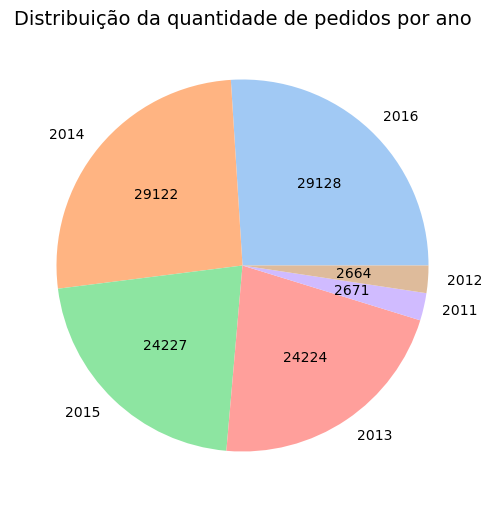

In [26]:
# your code goes here
def func(pct, all_values):
    absolute = int(round(pct / 100. * sum(all_values)))  # Converte percentual para valor absoluto
    return f"{absolute:}"  # Formata o número com separador de milhar
    #    return f"{absolute:,}\n({pct:.1f}%)"  # Formata o número com separador de milhar e percentual,
# foi desativado pois no nosso caso não queremos exibir o valor % e sim o valor


# Criando o gráfico de pizza
sales_counts = sales_clean['year'].value_counts()
sales_counts.plot(
    kind='pie', 
    figsize=(6, 9), 
    autopct=lambda pct: func(pct, sales_counts),  # Chama a função para exibir ambos os valores
    startangle=0,
    #startangle=90,  # Começa o gráfico a partir do topo
    #textprops={'rotation': 45, 'fontsize': 12}  # Rotaciona os rótulos e ajusta o tamanho da fonte

    colors=sns.color_palette('pastel')
)

# Personalizando o título
plt.title('Distribuição da quantidade de pedidos por ano', fontsize=14)

# Removendo o label do eixo Y (desnecessário em gráficos de pizza)
plt.ylabel('')

# Exibir o gráfico
plt.show()


<Axes: ylabel='count'>

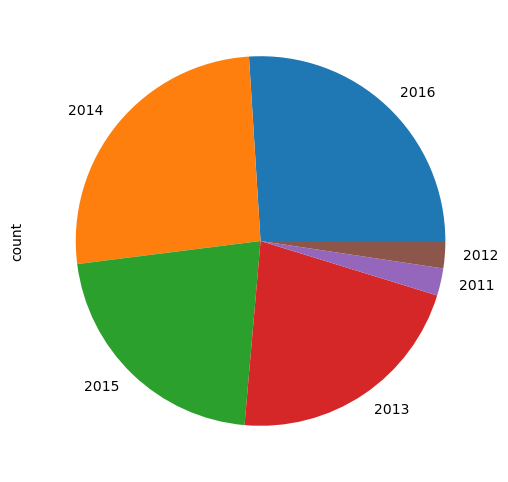

In [27]:
sales_clean['year'].value_counts().plot(kind='pie', figsize=(6,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many sales_clean per month do we have?

In [30]:
# your code goes here
sales_clean['month'].value_counts().sort_index()


month
April        10090
August        8128
December     11109
February      8956
January       9192
July          7400
June         11127
March         9591
May          11019
November      8646
October       8678
September     8100
Name: count, dtype: int64

In [29]:
sales_clean['Month'].value_counts()

KeyError: 'Month'

Go ahead and show a <b>bar plot</b> with the previous data:

In [ ]:
# your code goes here


In [ ]:
sales_clean['Month'].value_counts().plot(kind='bar', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Which country has the most sales_clean `quantity of sales_clean`?

In [ ]:
# your code goes here


In [ ]:
sales_clean['Country'].value_counts().head(1)

In [ ]:
sales_clean['Country'].value_counts()

Go ahead and show a <b>bar plot</b> of the sales_clean per country:

In [ ]:
# your code goes here


In [ ]:
sales_clean['Country'].value_counts().plot(kind='bar', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Create a list of every product sold

In [ ]:
# your code goes here


In [ ]:
#sales_clean.loc[:, 'Product'].unique()

sales_clean['Product'].unique()

Create a **bar plot** showing the 10 most sold products (best sellers):

In [ ]:
# your code goes here


In [ ]:
sales_clean['Product'].value_counts().head(10).plot(kind='bar', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Can you see any relationship between `Unit_Cost` and `Unit_Price`?

Show a <b>scatter plot</b> between both columns.

In [ ]:
# your code goes here


In [ ]:
sales_clean.plot(kind='scatter', x='Unit_Cost', y='Unit_Price', figsize=(6,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Can you see any relationship between `Order_Quantity` and `Profit`?

Show a <b>scatter plot</b> between both columns.

In [ ]:
# your code goes here


In [ ]:
sales_clean.plot(kind='scatter', x='Order_Quantity', y='Profit', figsize=(6,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Can you see any relationship between `Profit` per `Country`?

Show a grouped <b>box plot</b> per country with the profit values.

In [ ]:
# your code goes here


In [ ]:
sales_clean[['Profit', 'Country']].boxplot(by='Country', figsize=(10,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Can you see any relationship between the `Customer_Age` per `Country`?

Show a grouped <b>box plot</b> per country with the customer age values.

In [ ]:
# your code goes here


In [ ]:
sales_clean[['Customer_Age', 'Country']].boxplot(by='Country', figsize=(10,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Add and calculate a new `Calculated_Date` column

Use `Day`, `Month`, `Year` to create a `Date` column (`YYYY-MM-DD`).

In [ ]:
# your code goes here


In [ ]:
sales_clean['Calculated_Date'] = sales_clean[['Year', 'Month', 'Day']].apply(lambda x: '{}-{}-{}'.format(x[0], x[1], x[2]), axis=1)

sales_clean['Calculated_Date'].head()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Parse your `Calculated_Date` column into a datetime object

In [ ]:
# your code goes here


In [ ]:
sales_clean['Calculated_Date'] = pd.to_datetime(sales_clean['Calculated_Date'])

sales_clean['Calculated_Date'].head()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How did sales_clean evolve through the years?

Show a <b>line plot</b> using `Calculated_Date` column as the x-axis and the count of sales_clean as the y-axis.

In [ ]:
# your code goes here


In [ ]:
sales_clean['Calculated_Date'].value_counts().plot(kind='line', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Increase 50 U$S revenue to every sale

In [ ]:
# your code goes here


In [ ]:
#sales_clean['Revenue'] = sales_clean['Revenue'] + 50

sales_clean['Revenue'] += 50

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made in `Canada` or `France`?

In [ ]:
# your code goes here


In [ ]:
sales_clean.loc[(sales_clean['Country'] == 'Canada') | (sales_clean['Country'] == 'France')].shape[0]

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many `Bike Racks` orders were made from Canada?

In [ ]:
# your code goes here


In [ ]:
sales_clean.loc[(sales_clean['Country'] == 'Canada') & (sales_clean['Sub_Category'] == 'Bike Racks')].shape[0]

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made in each region (state) of France?

In [ ]:
# your code goes here


In [ ]:
france_states = sales_clean.loc[sales_clean['Country'] == 'France', 'State'].value_counts()

france_states

Go ahead and show a <b>bar plot</b> with the results:

In [ ]:
# your code goes here


In [ ]:
france_states.plot(kind='bar', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many sales_clean were made per category?

In [ ]:
# your code goes here


In [ ]:
sales_clean['Product_Category'].value_counts()

Go ahead and show a <b>pie plot</b> with the results:

In [ ]:
# your code goes here


In [ ]:
sales_clean['Product_Category'].value_counts().plot(kind='pie', figsize=(6,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made per accessory sub-categories?

In [ ]:
# your code goes here


In [ ]:
accessories = sales_clean.loc[sales_clean['Product_Category'] == 'Accessories', 'Sub_Category'].value_counts()

accessories

Go ahead and show a <b>bar plot</b> with the results:

In [ ]:
# your code goes here


In [ ]:
accessories.plot(kind='bar', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made per bike sub-categories?

In [ ]:
# your code goes here


In [ ]:
bikes = sales_clean.loc[sales_clean['Product_Category'] == 'Bikes', 'Sub_Category'].value_counts()

bikes

Go ahead and show a <b>pie plot</b> with the results:

In [ ]:
# your code goes here


In [ ]:
bikes.plot(kind='pie', figsize=(6,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Which gender has the most amount of sales_clean?

In [ ]:
# your code goes here


In [ ]:
sales_clean['Customer_Gender'].value_counts()

In [ ]:
sales_clean['Customer_Gender'].value_counts().plot(kind='bar')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many sales_clean with more than 500 in `Revenue` were made by men?

In [ ]:
# your code goes here


In [ ]:
sales_clean.loc[(sales_clean['Customer_Gender'] == 'M') & (sales_clean['Revenue'] == 500)].shape[0]

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Get the top-5 sales_clean with the highest revenue

In [ ]:
# your code goes here


In [ ]:
sales_clean.sort_values(['Revenue'], ascending=False).head(5)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Get the sale with the highest revenue

In [ ]:
# your code goes here


In [ ]:
#sales_clean.sort_values(['Revenue'], ascending=False).head(1)

cond = sales_clean['Revenue'] == sales_clean['Revenue'].max()

sales_clean.loc[cond]

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What is the mean `Order_Quantity` of orders with more than 10K in revenue?

In [ ]:
# your code goes here


In [ ]:
cond = sales_clean['Revenue'] > 10_000

sales_clean.loc[cond, 'Order_Quantity'].mean()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What is the mean `Order_Quantity` of orders with less than 10K in revenue?

In [ ]:
# your code goes here


In [ ]:
cond = sales_clean['Revenue'] < 10_000

sales_clean.loc[cond, 'Order_Quantity'].mean()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made in May of 2016?

In [ ]:
# your code goes here


In [ ]:
cond = (sales_clean['Year'] == 2016) & (sales_clean['Month'] == 'May')

sales_clean.loc[cond].shape[0]

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made between May and July of 2016?

In [ ]:
# your code goes here


In [ ]:
cond = (sales_clean['Year'] == 2016) & (sales_clean['Month'].isin(['May', 'June', 'July']))

sales_clean.loc[cond].shape[0]

Show a grouped <b>box plot</b> per month with the profit values.

In [ ]:
# your code goes here


In [ ]:
profit_2016 = sales_clean.loc[sales_clean['Year'] == 2016, ['Profit', 'Month']]

profit_2016.boxplot(by='Month', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Add 7.2% TAX on every sale `Unit_Price` within United States

In [ ]:
# your code goes here


In [ ]:
#sales_clean.loc[sales_clean['Country'] == 'United States', 'Unit_Price'] = sales_clean.loc[sales_clean['Country'] == 'United States', 'Unit_Price'] * 1.072

sales_clean.loc[sales_clean['Country'] == 'United States', 'Unit_Price'] *= 1.072

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)